In class we spoke about the replicator dynamics equation: a differential
equation that is a building block of evolutionary game theory.

You can see a recording of this [here](https://cardiff.cloud.panopto.eu/Panopto/Pages/Viewer.aspx?id=0afdd506-fee8-4a1f-9d47-b2890118f7a0).

I asked you all to suggest examples of social conventions. I then picked the
idea of asking "How are you?" and responding "Fine" as a socially
conventionally greeting to explore from an evolutionary game theoretic point of
view.

We used the following game to model this using [Replicator Dynamics](https://vknight.org/gt/topics/replicator-dynamics.html):

$$
A = \begin{pmatrix}
    2 & -1 \\
    0 & 2\\
\end{pmatrix}
$$

This assumes a population of two types of individuals:

- The first type \\(H\\): individuals who say "How are you?" and expect "Fine"
  to complete the greeting. These individuals get a utility of 2 when meeting
  each other and a utility of -1 when meeting someone who does not follow the
  convention.
- The second type \\(\bar H\\): individuals who use a different type of
  greeting. These individuals get a utility of 0 when meeting someone of type
  \\(H\\) and 2 when meeting someone of their own type.

We then model a given population using a vector \\(x=(x_1, x_2)\\) where \\(x_1\\)
corresponds to the **proportion** of individuals of the type \\(H\\) and
\\(x_2=1-x_1\\) is the **proportion** of the type \\(\bar H\\).

Let us use `sympy` to create all these variables:

In [1]:
import sympy as sym
import nashpy as nash
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1 = sym.Symbol("x_1")
x2 = sym.Symbol("x_2")

We can then compute the average fitness of individuals of each type:

$$
f_1 = 2x_1 - x_2
$$

The average fitness of the individuals of the second type are:

$$
f_2 = 0\times x_1 + 2x_2 = 2x_2
$$

In [3]:
f1 = 2 * x1 - x2
f1

2*x_1 - x_2

In [4]:
f2 = 0 * x1 + 2 * x2

In [5]:
f2

2*x_2

The average utility over the entire population is then given by:

$$\phi=x_1f_1+x_2f_2$$

In [6]:
phi = x1 * f1 + x2 * f2
phi

x_1*(2*x_1 - x_2) + 2*x_2**2

In the [notes on Replicator
Dynamics](https://nashpy.readthedocs.io/en/stable/text-book/replicator-dynamics.html#)
you can find linear algebraic expressions of these quantities \\(f\\) and
\\(\phi\\) that extend naturally to populations with more than just 2 types.

The **actual** Replicator Dynamics equation is then given by:

$$
\frac{dx_i}{dt} = x_i(f_i-\phi)\text{ for all}i
$$

In the case of our game this corresponds to:

$$
\begin{align}
\frac{dx_1}{dt} =& x_1 (2x_1 - x_2 - x_1(2x_1 - x_2)-2x_2)\\
\frac{dx_2}{dt} =& x_2 (2x_2 - x_2 - x_1(2x_1 - x_2)-2x_2)
\end{align}
$$

In [7]:
rhs_of_dx1dt = x1 * (f1 - phi)
rhs_of_dx1dt

x_1*(-x_1*(2*x_1 - x_2) + 2*x_1 - 2*x_2**2 - x_2)

In [8]:
rhs_of_dx2dt = x2 * (f2 - phi)
rhs_of_dx2dt

x_2*(-x_1*(2*x_1 - x_2) - 2*x_2**2 + 2*x_2)

Let us substitute \\(x_2=1-x_1\\) and factorise:

In [9]:
sym.factor(rhs_of_dx1dt.subs({x2 : 1 - x1}))

-x_1*(x_1 - 1)*(5*x_1 - 3)

In [10]:
sym.factor(rhs_of_dx2dt.subs({x2 : 1 - x1}))

x_1*(x_1 - 1)*(5*x_1 - 3)

This gives:

$$
\begin{align}
\frac{dx_1}{dt} =& - x_{1} \left(x_{1} - 1\right) \left(5 x_{1} - 3\right)\\
\frac{dx_2}{dt} =& x_{1} \left(x_{1} - 1\right) \left(5 x_{1} - 3\right)
\end{align}
$$

We note that \\(\frac{dx_1}{dt}=-\frac{dx_2}{dt}\\) which is expected as we have
\\(x_1+x_2=1\\).

And we see (setting the derivatives to be equal to 0) that there are 3 stable
populations:

In [11]:
equation = sym.Eq(lhs=rhs_of_dx1dt.subs({x2 : 1 - x1}), rhs=0)
sym.solveset(equation, x1)

{0, 3/5, 1}


- \\(x_1=0\\): No one uses "Hello how are you" as a greeting.
- \\(x_1=1\\): Everyone uses "Hello how are you" as a greeting.
- \\(x_1=3/5\\): 60% the population uses "Hello how are you" as a greeting.

The fact that this is **stable** mathematically (ie the derivatives are zero)
corresponds to the game theoretic fact that in these populations every type of
individual has the same fitness: **so no one behaviour has an evolutionary
advantage.**

Let us see how the replicator dynamics equation can be [solved numerically](https://nashpy.readthedocs.io/en/stable/how-to/use-replicator-dynamics.html) so that 
the populations can be observed over time.

In [12]:
A = np.array([[2, -1], [0, 2]])
game = nash.Game(A)

## Starting with a uniformly distributed population

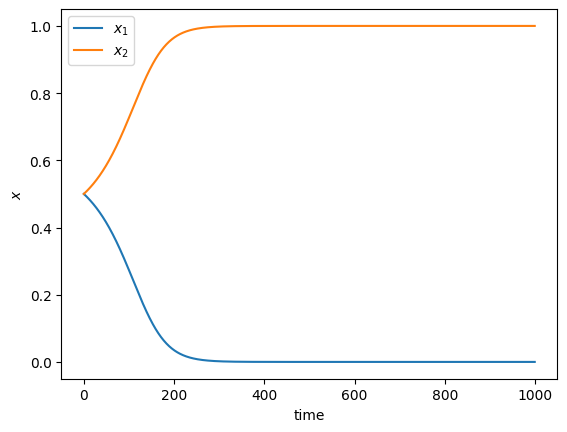

In [13]:
initial_population = np.array([.5, .5])
timepoints = np.linspace(0, 10, 1000)
populations = game.replicator_dynamics(y0=initial_population, timepoints=timepoints)
x1s, x2s = populations.T


plt.figure()
plt.plot(x1s, label="$x_1$")
plt.plot(x2s, label="$x_2$")
plt.legend()
plt.xlabel("time")
plt.ylabel("$x$");

We see that if we start with $x=(1/2, 1/2)$ the population converges to no one using "Hello how are you" as a greeting.

## Starting with a small population of $\bar H$

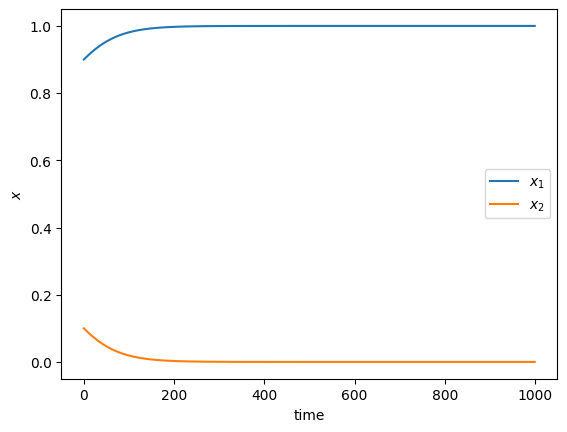

In [14]:
initial_population = np.array([.9, .1])
timepoints = np.linspace(0, 10, 1000)
populations = game.replicator_dynamics(y0=initial_population, timepoints=timepoints)
x1s, x2s = populations.T


plt.figure()
plt.plot(x1s, label="$x_1$")
plt.plot(x2s, label="$x_2$")
plt.legend()
plt.xlabel("time")
plt.ylabel("$x$");

We see that with a small amount of $\bar H$ that small amount gets rejected by the population.

## Confirm that $x_1=3/5$ is stable:

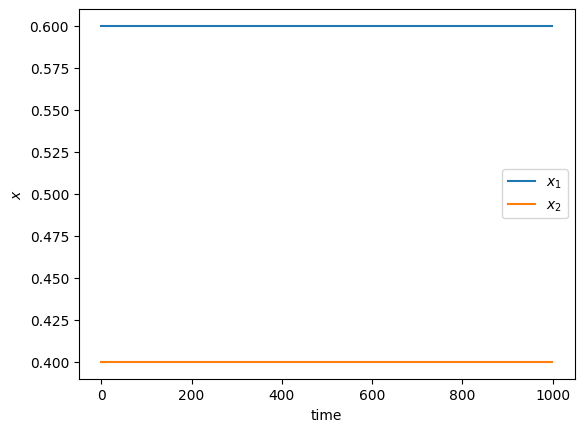

In [15]:
initial_population = np.array([3 / 5, 2 / 5])
timepoints = np.linspace(0, 10, 1000)
populations = game.replicator_dynamics(y0=initial_population, timepoints=timepoints)
x1s, x2s = populations.T


plt.figure()
plt.plot(x1s, label="$x_1$")
plt.plot(x2s, label="$x_2$")
plt.legend()
plt.xlabel("time")
plt.ylabel("$x$");

This confirms the 0 derivative. Let us see what happens if we budge slightly from that population.

First: a small increase of \\(H\\):

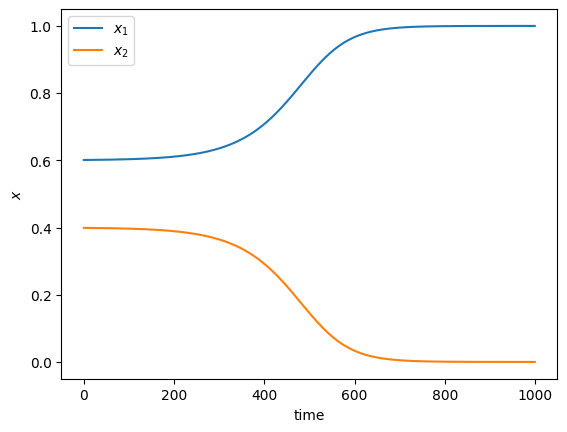

In [16]:
epsilon = 10 ** -3

initial_population = np.array([3 / 5 + epsilon, 2 / 5 - epsilon])
timepoints = np.linspace(0, 10, 1000)
populations = game.replicator_dynamics(y0=initial_population, timepoints=timepoints)
x1s, x2s = populations.T


plt.figure()
plt.plot(x1s, label="$x_1$")
plt.plot(x2s, label="$x_2$")
plt.legend()
plt.xlabel("time")
plt.ylabel("$x$");

We see that that small nudge is enough to force the population to all adopt "Hello how are you" as a greeting.

What if the nudge was the other way?

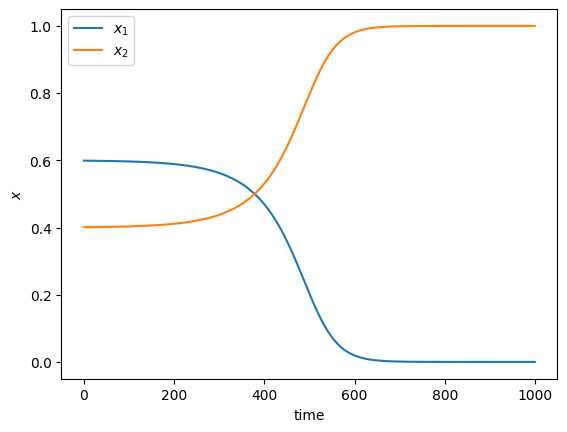

In [17]:
epsilon = 10 ** -3

initial_population = np.array([3 / 5 - epsilon, 2 / 5 + epsilon])
timepoints = np.linspace(0, 10, 1000)
populations = game.replicator_dynamics(y0=initial_population, timepoints=timepoints)
x1s, x2s = populations.T


plt.figure()
plt.plot(x1s, label="$x_1$")
plt.plot(x2s, label="$x_2$")
plt.legend()
plt.xlabel("time")
plt.ylabel("$x$");

This is enough to nudge the population to stop using "Hello how are you" as a greeting.